# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [3]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


## Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: 

For PCA, the first dimension should be the vector along which the dataset exhibits the most variance. Since we know from the descriptive stats that the largest standard deviation 12647.329 is for the 'Fresh' category, the resulting first dimension shown in PCA should be this category. 

For ICA, the type of vectors show up should be a set of mutually independent vectors representing customers' expenditure patterns. For example, given two events A and B, if the joint probability P(A, B) is equal to P(A)*P(B), we call the two events are mutually independent. I think one of the vectors represents the 'Fresh' category and another represents the 'Milk' plus 'Grocery'. 

### PCA

In [4]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=data.shape[1])
pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


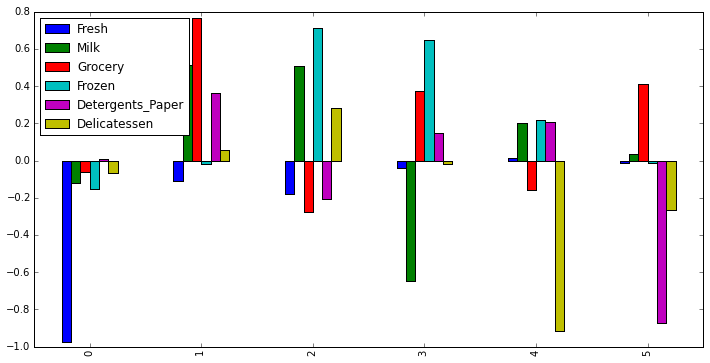

In [8]:
pd.DataFrame(pca.components_, columns = data.columns).plot(kind = 'bar', figsize = (12,6))

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 

The variance of the first dimension is 0.45, which means the data along this vector has the largest variance. The variance of the second largest dimension is 0.405, but it plunges to 0.07 for the third largest dimesion. Therefore there is a dramatic decline by dimension. All the last three dimensions have very small variances, therefore the data do not vary much along these three vectors.

I will choose the first two largest dimensions because the ratio of these two variances over the whole variances is about 0.865, which is comparatively large enough. 

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 

The dimensions seem to represent the eigen patterns of customers' expenditure on goods. The first dimension illustrates how large the variances are on the purchases of 'Fresh' goods. The second dimension corresponds to the 'Milk',  'Gorcery' and 'Detergents_Paper' categories, which can be used to explain in which categories there are larger discrepancy. 

With these information, we know that these categories can be used to cluster the dataset. For example, the customers who spent small amount of money on Fresh, Milk, Gorcery and Detergents_Paper should be separated from those spent much money on these purchases. 

### ICA

In [5]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components=data.shape[1], random_state=0)

data_mean = data - np.mean(data, axis = 0)
# data_mean = data.copy()
# data_mean -= data_mean.mean(axis=0)
# data_mean /= data_mean.std(axis=0)

ica.fit(data_mean) 
# Print the independent components
print ica.components_

[[ -3.96476778e-06   9.45325808e-07   4.66853032e-07   7.07404180e-07
   -1.60162442e-06   1.02573298e-06]
 [  2.95200606e-07  -1.04371945e-06  -1.36507959e-05   1.32245720e-06
    2.77800563e-05   5.37812672e-06]
 [ -3.88351141e-07  -3.13090138e-07  -6.05147731e-07  -5.30446962e-07
    4.43452988e-07   1.81800253e-05]
 [ -2.22243559e-07   6.98550165e-06  -5.27194420e-06  -7.60920714e-07
   -4.59784873e-06  -3.31640062e-06]
 [ -3.39493192e-07  -7.46323064e-06   2.52138482e-06   7.61921583e-08
   -4.01019796e-06   5.36150524e-06]
 [ -8.61165212e-07  -1.94837286e-07   8.68147245e-07   1.11487357e-05
   -6.00050152e-07  -5.93971213e-06]]


In [6]:
# normalize each vector so that it can be explained clearly
print ica.components_ / np.linalg.norm(ica.components_, axis = 1).reshape(6,1)
#    Fresh       Milk       Grocery     Frozen  Detergents_Paper  Delicatessen

[[-0.86624143  0.2065393   0.10200028  0.15455705 -0.34993056  0.22410705]
 [ 0.00938244 -0.03317283 -0.43386712  0.04203203  0.88294142  0.17093453]
 [-0.02132618 -0.01719325 -0.0332315  -0.02912933  0.02435208  0.9983505 ]
 [-0.02125222  0.6679944  -0.50413404 -0.07276368 -0.4396731  -0.31713356]
 [-0.03281917 -0.72147859  0.243745    0.00736558 -0.38767018  0.51830252]
 [-0.06777094 -0.01533307  0.06832041  0.87736976 -0.04722202 -0.46743631]]


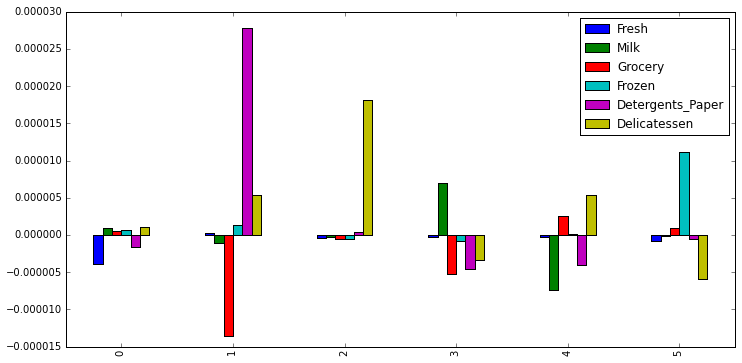

In [7]:
pd.DataFrame(ica.components_, columns = data.columns).plot(kind = 'bar', figsize = (12,6))

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

   1. Fist vector: It corresponds to the 'Fresh', 'Detergents_Paper'   
   2. Second vector: It corresponds to the 'Grocery', 'Detergents_Paper'  
   3. Third vector: It corresponds to the ‘Delicatessen’ 
   4. Fourth vector: It corresponds to the 'Milk', 'Grocery', 'Detergents_Paper', 'Delicatessen'   
   5. Fifth vector: It corresponds to the 'Milk', 'Grocery', 'Detergents_Paper', 'Delicatessen' 
   6. Six vector: It cooresponds to 'Frozen', 'Delicatessen'
    
   These components can be used to calculate a set of combinations in which one category is correlation or anti-correlation with another category purchases.
   
   From PCA we know that there is no large diversity on 'Fronzen' and 'Delicatessen' in the dataset, and hence the important categories should be the remaining four categories. We can choose the 1st, 2nd, 4th, 5th vectors as the base vectors. By using linear combinations, the resulting rules can be used to cluster the dataset.
   
   1. 1st: Fresh is correlated with Detergents_Paper.
   2. 2nd: Grocery is anticorrelated with Detergents_Paper.  
   3. 1st+2nd: Fresh is correlated with Grocery, but anticorrelated with Detergents_Paper.   
   4. 4th: Milk is anticorrelated with Grocery and Detergents_Paper.  
   5. 4th+5th to cancel Fresh: Milk is anticorrelated with Grocery.
   
   We can get the following ideas about customers:
   
   1. The purchase of Milk is not strongly correlated with the purchase of Fresh.    
   2. Customers buying lots of Fresh also purchased lots of Detergents_Paper, and if they purchased little Detergents_Paper, they would bought lots of Grocery.  
   3. Customers buying lots of Milk bought less Grocery and Detergents_Paper.

## Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

### Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

#### On the level of structural information:

Gaussian Mixture Models (GMMs) assume the data was from one of k Gaussian distributions. It was generated by:
1. Select one of k Gaussians with known variances uniformly
2. Sample Xi from that Gaussian
3. Repeat n times
Then n points belong to a cluster. 

On the contrary, K Means clustering does not take into account the structural information among the data.

#### On the level of boundary information and how they classify:

GMMs classify datasets by the expectation maximization. Suppose there exist a set of hidden variables Z_{ij}. At the beginning we choose the means of k clusters randomly, mu_i, then we calculate the following two equations iteratively:
1. the expectation of Z_{ij}: E[Z_{ij}] = P( X=X_i | mu = mu_j ) / Sum_{i=1}^{N_j}{ p(X=X_i | mu = mu_j }
2. the maximization of mean value mu_j: Sum_i{ E[Z_{ij} * X_i } / Sum_i{ E[Z_{ij}] }

where the N_j is the number of datapoint in jth cluster, the probability is the Gaussian distribution with fixed known variance. Since the Gaussian distributions are probabilistic, the datapoints on the boundary will belong to two clusters with the probability from including .4 to including .6.

To retrieve the K means clustering, we can simply set the probability P(X=X_i | mu = mu_j) to 1 if and only if there is one cluster which a datapoint belongs to, otherwise P = 0. Thus the expection of Z_{ij} = 1 / N_j and the mean value is Sum_i{X_i} / N_j, the mean value itself. The clustering is decided by calculating the distances from the centers of clusters to datapoints. A datapoint belongs to the cluster which is closest to it. Since K means clustering is a hard assignment, the data on the boundary is clustered into only one group. 

#### GMM is the best choice

Since there is no strict rule determining the clustering, it is highly possible that some customers on the boundary of two groups can be clusetered into two groups simultaneously. Thus GMM does better jobs on the dataset.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [38]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [40]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation

reduced_data = PCA(n_components=2).fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

offset = np.array([ min(reduced_data[:,0])-1, min(reduced_data[:,1])-1 ])
reduced_data -= offset 
reduced_data = np.log10(reduced_data)
reduced_data = reduced_data[np.nonzero(reduced_data[:,0])]
reduced_data = reduced_data[np.nonzero(reduced_data[:,1])]

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=2, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)
[[ 4.86945394  3.96987096]
 [ 5.02462524  4.04761143]]


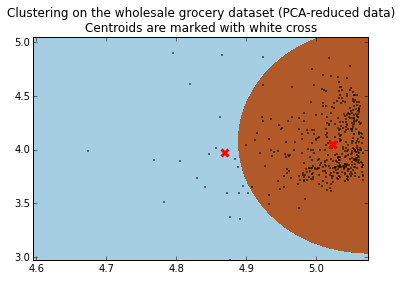

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)
[[ 4.87433631  3.69870102]
 [ 5.03095906  4.22568985]
 [ 5.02000643  3.85600059]
 [ 4.91627905  4.57640369]]


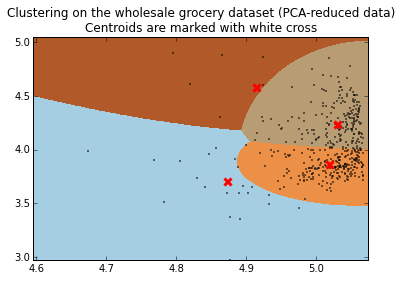

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=5, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)
[[ 5.01313809  4.02133314]
 [ 4.91726541  4.54999148]
 [ 5.03393729  4.25474016]
 [ 4.86718124  3.67217787]
 [ 5.0217752   3.84036134]]


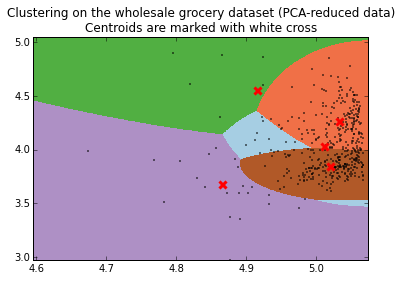

In [49]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

for i in np.array([2,4,5]):
    # clusters = KMeans(n_clusters=8)
    clusters = GMM(n_components=i)
    clusters.fit(reduced_data)
    print clusters

    # Plot the decision boundary by building a mesh grid to populate a graph.
    x_min, x_max = reduced_data[:, 0].min(), reduced_data[:, 0].max()+0.007
    y_min, y_max = reduced_data[:, 1].min(), reduced_data[:, 1].max()
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

    # TODO: Find the centroids for KMeans or the cluster means for GMM 
    centroids = clusters.means_
    # centroids = np.vstack([centroids, [0,0]])
    print centroids

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=3,
                color='r', zorder=10)
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
#     plt.xticks(())
#     plt.yticks(())
    plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: I use GMM method to group the data into two or four clusters because the central object in each cluster can be easily explained. However, the clustering of two seems to be too simple. I perfer to cluster into four groups.


1. First cluster [ 4.87433631  3.69870102] is for the customers spending little on both of Fresh and Milk and Grocery.
2. Second cluster [ 5.03095906  4.22568985] is for the customers purchasing lots of Fresh and lots of Milk and Grocery. 
3. Thired cluster  [ 5.02000643  3.85600059] is for the customers spending much on Fresh but little on Milk and Grocery.
4. Fourth cluster [ 4.91627905  4.57640369] is for the customers purchasing little Fresh but lots of Milk and Grocery.



### Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: I feel the GMM method is better. 

In the K Means method, we are certain that a data point belongs to only one cluster. This is a "hard assignment". While in the GMM, a data point may be grouped into different clusters simultaneouly with different probabilities. This is called "soft assignment". The method incorporates the degree of uncertainty we have about out assignment.

Furthermore, we find that the boundaries in K Means method are always straight lines, which are less accurate than the curving boundaries in the GMM. 

By using GMM, we can have an idea about the groups of the customers based on their expenditure for Fresh and for Milk and Grocery, which can be shown clearly in the plot above. In this way, we can make better prdictions about customers' needs according to the clustering.

**9)** How would you use that technique to help the company design new experiments?

Answer: Several customers from the same cluster can be sampled and let them try both the regular morning delivery and the cheaper, bulk evening delivery. Based on their feedback and the analysis of their cusumption habits, the company can launch different delivery method for different groups of customers.

**10)** How would you use that data to help you predict future customer needs?

Answer: After the unsupervised learning process finished, we can use the data as the training dataset and label each group with the results from the unsupervised learning to train a supervised learner, then future customer needs can be predicted by the model. The labels for the future supervised learning is the groups we have concluded through the unsupervised learning: whether spending much on Fresh or little on Fresh and whether purchasing lots of Milk, Grocery or a handful of Milk, Grocery. 

Actually, the real dataset is attached with a survey conducted by the wholesale in which customers are asked to choose from a set of policies and measures which they think can be improved. By comparing their responces and the results of the unsupervised learning, it may be clear to show the different needs for different kinds of customers.